In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
dataset=pd.read_csv("Original_Dataset.csv")
dataset

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
symptoms=[]
## this loop is for creating new column called Symptoms that contain each row's values 
for i in range(len(dataset)):
    value=dataset.iloc[i].values.tolist()## values of each row
    if 0 in value:
         symptoms.append(value[1:value.index(0)]) ## if value is 0 only append data in row that is not 0
    else:
        symptoms.append(value[1:])
        
dataset["Symptoms"]=symptoms
dataset

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,Symptoms
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[itching, skin_rash, nodal_skin_eruptions, ..."
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[ skin_rash, nodal_skin_eruptions, dischromi..."
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[itching, nodal_skin_eruptions, dischromic _..."
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[itching, skin_rash, dischromic _patches, na..."
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[itching, skin_rash, nodal_skin_eruptions, n..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[ vomiting, headache, nausea, spinning_move..."
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[ skin_rash, pus_filled_pimples, blackheads,..."
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[ burning_micturition, bladder_discomfort, f..."
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[ skin_rash, joint_pain, skin_peeling, silv..."


## Data preprocessing 1

In [7]:
from sklearn.preprocessing import LabelEncoder

column_values=dataset[["Symptom_1","Symptom_2","Symptom_3","Symptom_4","Symptom_5","Symptom_6","Symptom_7","Symptom_8","Symptom_9",
"Symptom_10","Symptom_11","Symptom_12","Symptom_13","Symptom_14","Symptom_15","Symptom_16","Symptom_17"]].values.ravel()
symps=pd.unique(column_values).tolist() 
symps=[i for i in symps if str(i)!="nan"] ## get all unique symptoms in dataset


## Creating DataFrame with binary indicators

new_data=pd.DataFrame(0,columns=symps,index=dataset.index)
new_data["Disease"]=dataset["Disease"]

for col in symps:
    new_data[col]=dataset["Symptoms"].apply(lambda x:1 if col in x else 0)
x1=new_data.drop(["Disease"],axis=1)
encode=LabelEncoder()
y1=dataset["Disease"]
y1=encode.fit_transform(y1)

x1

,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,continuous_sneezing,shivering,chills,watering_from_eyes,stomach_pain,acidity,...,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
4918,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,0,0,0


## Second way for data preprocessing

In [10]:
new_data2=pd.DataFrame(columns=dataset.columns,index=dataset.index)
x2=new_data2.drop(["Disease","Symptoms"],axis=1)
columns=x2.columns.tolist()
columns
for i in columns:
       x2[i]=dataset[i].apply(lambda x2: symps.index(x2)+1 if x2 in symps else 0)

y2=dataset["Disease"]
y2=encode.fit_transform(y2)
x2

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,1,2,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,12,45,16,117,47,118,0,0,0,0,0,0,0,0,0,0,0
4916,2,119,120,121,0,0,0,0,0,0,0,0,0,0,0,0,0
4917,20,122,123,124,0,0,0,0,0,0,0,0,0,0,0,0,0
4918,2,65,125,126,127,128,0,0,0,0,0,0,0,0,0,0,0


# Train LogisticRegression Model based on first dataset preprocessing

In [32]:
from sklearn.model_selection import train_test_split,cross_val_score,KFold,ShuffleSplit,LeavePOut

X_train,X_test,y_train,y_test=train_test_split(x1,y1,test_size=0.3)


In [193]:
from sklearn.model_selection import GridSearchCV

hyper_parameter={'multi_class':['ovr','multinomial'],
                'solver':['newton-cg', 'lbfgs','saga'],
                 'C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
              }
k_folds = KFold(n_splits = 10,shuffle=True,random_state=10)

grid_search=GridSearchCV(LogisticRegression(),hyper_parameter,cv=k_folds, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)
print("Best estimator: ", grid_search.best_estimator_)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
Best parameters found:  {'C': 0.01, 'multi_class': 'ovr', 'solver': 'newton-cg'}
Best cross-validation score:  1.0
Best estimator:  LogisticRegression(C=0.01, multi_class='ovr', solver='newton-cg')


In [452]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression(C=0.001)
log_model


LogisticRegression(C=0.001)

In [454]:
## Suffle data 
shuffle_split = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
k_folds = KFold(n_splits = 10,shuffle=True,random_state=10)
scores = cross_val_score(log_model, X_train, y_train, cv=10, scoring='accuracy')
scores_shuffle_split = cross_val_score(log_model, X_train, y_train, cv=shuffle_split, scoring='accuracy')
scores_k_folds = cross_val_score(log_model, X_train, y_train, cv=k_folds, scoring='accuracy')

print(scores.mean())
print(scores_shuffle_split.mean())
print(scores_k_folds.mean())


0.9065065722952477
0.7161508704061895
0.8919952814290528


In [456]:
log_model.fit(X_train,y_train)

LogisticRegression(C=0.001)

In [458]:
y_pred=log_model.predict(X_test)

In [460]:
from sklearn.metrics import f1_score,precision_score,classification_report,confusion_matrix, accuracy_score

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred,zero_division=1)
print("Classification Report:",)
print (result1)
print("Accuracy :",accuracy_score(y_test,y_pred))
print('F1 : ',f1_score(y_test, y_pred, average='weighted'))


Confusion Matrix:
[[27  0  0 ...  0  0  0]
 [ 0 29  0 ...  0  0  0]
 [ 0  0 30 ...  0  0  0]
 ...
 [ 0  0  0 ... 25  0  0]
 [ 0  0  0 ...  0 29  0]
 [ 0  0  0 ...  0  0  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        27
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        30
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        37
           5       1.00      1.00      1.00        37
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        36
           8       1.00      1.00      1.00        41
           9       1.00      0.00      0.00        43
          10       1.00      1.00      1.00        38
          11       1.00      1.00      1.00        41
          12       1.00      1.00      1.00        32
          13       1.00      1.00      1.00   

# Train LogisticRegression model based on Second data-preprocessing

In [27]:
X_train,X_test,y_train,y_test=train_test_split(x2,y2,test_size=0.3)


In [29]:
log_model=LogisticRegression()
log_model


LogisticRegression()

In [31]:
from sklearn.preprocessing import StandardScaler ,MinMaxScaler
#sc=StandardScaler()
sc=MinMaxScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [33]:
shuffle_split = ShuffleSplit(n_splits=10, test_size=0.3)
k_folds = KFold(n_splits = 10,shuffle=True)
scores = cross_val_score(log_model, X_train, y_train, cv=10, scoring='accuracy')
scores_shuffle_split = cross_val_score(log_model, X_train, y_train, cv=shuffle_split, scoring='accuracy')
scores_k_folds = cross_val_score(log_model, X_train, y_train, cv=k_folds, scoring='accuracy')

print("scores cv=10")
print(scores.mean())

print("scores cv=shuffle_split")
print(scores_shuffle_split.mean())
print("scores cv=k_folds")
print(scores_k_folds.mean())


scores cv=10
0.8545365689248399
scores cv=shuffle_split
0.8263056092843326
scores cv=k_folds
0.850149983147961


In [35]:
log_model.fit(X_train,y_train)

LogisticRegression()

In [37]:
y_pred=log_model.predict(X_test)

In [39]:
import warnings
warnings.filterwarnings('always') 
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred,zero_division=True)
print("Classification Report:",)
print (result1)

print("Accuracy :",accuracy_score(y_test,y_pred))
print('F1 : ',f1_score(y_test, y_pred, average='weighted'))


Confusion Matrix:
[[30  0  0 ...  0  0  0]
 [ 0 36  0 ...  0  0  0]
 [ 0  0 38 ...  5  0  0]
 ...
 [ 0  0  0 ... 38  0  0]
 [ 0  0  0 ...  0 34  0]
 [ 0  0  0 ...  0  0 24]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81        35
           1       0.73      1.00      0.85        36
           2       0.93      0.88      0.90        43
           3       1.00      0.79      0.88        43
           4       0.00      0.00      0.00        40
           5       0.85      0.87      0.86        38
           6       1.00      0.94      0.97        33
           7       0.89      1.00      0.94        34
           8       0.79      1.00      0.88        34
           9       1.00      0.88      0.93        32
          10       1.00      1.00      1.00        29
          11       1.00      1.00      1.00        36
          12       1.00      1.00      1.00        36
          13       0.85      1.00      0.92   

## SVM

## Training SVM model based on First data preprocessing 

In [420]:
from sklearn.svm import SVC

X_train,X_test,y_train,y_test=train_test_split(x1,y1,test_size=0.3)

## Grid Search  

In [536]:
from sklearn.model_selection import GridSearchCV

# HyperParametrs= { 'C': [0.1, 1, 10, 100, 1000],  
#    'kernel': ['rbf','linear','sigmoid','poly'],
#     'decision_function_shape':['ovo', 'ovr']}


HyperParametrs={'C': [0.1, 1],  
              'kernel': ['poly'],
               'degree':[4, 5,6,7,8]}

# HyperParametrs=[{'kernel': ['rbf','poly'], 'gamma': [1e-3, 1e-4],
#                      'C': [0.1,1, 10, 100, 1000]},
#                     {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
svm =SVC()
grid_search = GridSearchCV(svm, HyperParametrs, cv=10, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)
print("Best estimator: ", grid_search.best_estimator_)



Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best parameters found:  {'C': 1, 'degree': 4, 'kernel': 'poly'}
Best cross-validation score:  0.9875134816312773
Best estimator:  SVC(C=1, degree=4, kernel='poly')


In [538]:
#clf = SVC(C=0.01, degree=4, gamma=1, kernel='poly')
#clf=SVC(C=10, gamma=0.001)
#clf=SVC(C=0.01)
#clf=SVC(C=0.1, decision_function_shape='ovo')
#clf=SVC(kernel='poly', degree=4, C=0.1) ## it worked 

# clf= SVC(C=0.1, degree=2, kernel='poly')


#clf=SVC(C=10, degree=4, kernel='poly')
clf=SVC(C=1, degree=4, kernel='poly') #######
#clf=SVC(C=0.1, kernel='poly')

#clf = SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)

In [540]:
shuffle_split = ShuffleSplit(n_splits=10, test_size=0.3)
k_folds = KFold(n_splits = 10,shuffle=True)
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
scores_ss = cross_val_score(clf, X_train, y_train, cv=shuffle_split, scoring='accuracy')
scores_k_folds = cross_val_score(clf, X_train, y_train, cv=k_folds, scoring='accuracy')

print("scores cv=10")
print(scores.mean())

print("scores cv=shuffle_split")
print(scores_ss.mean())
print("scores cv=k_folds")
print(scores_k_folds.mean())


scores cv=10
0.9875134816312773
scores cv=shuffle_split
0.9774661508704062
scores cv=k_folds
0.985191270643748


In [542]:
clf.fit(X_train,y_train)

SVC(C=1, degree=4, kernel='poly')

In [544]:
y_pred=clf.predict(X_test)

In [546]:
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
print("Accuracy :",accuracy_score(y_test,y_pred))
print('F1 : ',f1_score(y_test, y_pred, average='weighted'))

Confusion Matrix:
[[27  0  0 ...  0  0  0]
 [ 0 29  0 ...  0  0  0]
 [ 0  0 30 ...  0  0  0]
 ...
 [ 0  0  0 ... 25  0  0]
 [ 0  0  0 ...  0 29  0]
 [ 0  0  0 ...  0  0 48]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        30
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        37
           5       1.00      1.00      1.00        37
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        36
           8       1.00      1.00      1.00        41
           9       1.00      1.00      1.00        43
          10       1.00      1.00      1.00        38
          11       1.00      1.00      1.00        41
          12       1.00      1.00      1.00        32
          13       1.00      1.00      1.00   

## Train SVM based on Seconed data-preprocessing

In [550]:
# import warnings
# warnings.filterwarnings('always') 
X_train,X_test,y_train,y_test=train_test_split(x2,y2,test_size=0.3)

In [58]:
from sklearn.preprocessing import StandardScaler ,MinMaxScaler
#sc=StandardScaler()
# sc=MinMaxScaler()
# X_train=sc.fit_transform(X_train)
# X_test=sc.transform(X_test)

In [60]:
# ss = ShuffleSplit(n_splits=10, test_size=0.3)
# k_folds = KFold(n_splits = 10,shuffle=True)
HyperParametrs= { 'kernel': ['rbf','linear','sigmoid'],'C': [1, 10, 100]}
svm =SVC()
grid_search = GridSearchCV(svm, HyperParametrs, cv=10, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)
print("Best estimator: ", grid_search.best_estimator_)



Fitting 10 folds for each of 9 candidates, totalling 90 fits
Best parameters found:  {'C': 100, 'kernel': 'rbf'}
Best cross-validation score:  0.9973862487360972
Best estimator:  SVC(C=100)


In [552]:
from sklearn import svm

rbf=svm.SVC(kernel='rbf',C=100)
shuffle_split = ShuffleSplit(n_splits=10, test_size=0.3)
k_folds = KFold(n_splits = 10,shuffle=True)
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
scores_shuffle_split = cross_val_score(clf, X_train, y_train, cv=shuffle_split, scoring='accuracy')
scores_k_folds = cross_val_score(clf, X_train, y_train, cv=k_folds, scoring='accuracy')

print("scores cv=10")
print(scores.mean())

print("scores cv=shuffle_split")
print(scores_shuffle_split.mean())
print("scores cv=k_folds")
print(scores_k_folds.mean())



scores cv=10
0.721835187057634
scores cv=shuffle_split
0.7108317214700193
scores cv=k_folds
0.7261813279406807


In [64]:
rbf.fit(X_train,y_train)


SVC(C=100)

In [66]:
y_pred=rbf.predict(X_test)

In [68]:

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)


print("Accuracy :",accuracy_score(y_test,y_pred))
print('F1 : ',f1_score(y_test, y_pred, average='weighted'))


Confusion Matrix:
[[35  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 0  0 31 ...  2  0  0]
 ...
 [ 0  0  0 ... 42  0  0]
 [ 0  0  0 ...  0 35  0]
 [ 0  0  0 ...  0  0 31]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        24
           2       1.00      0.94      0.97        33
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        25
           5       1.00      1.00      1.00        43
           6       1.00      1.00      1.00        37
           7       1.00      1.00      1.00        40
           8       1.00      1.00      1.00        32
           9       1.00      1.00      1.00        43
          10       1.00      1.00      1.00        33
          11       1.00      1.00      1.00        42
          12       1.00      1.00      1.00        29
          13       1.00      1.00      1.00   

## Training Random forest based on First dataset preprocessing

In [802]:
X_train,X_test,y_train,y_test=train_test_split(x1,y1,test_size=0.25)

# print("cross validation score :",cross_val_score(clf, x, y, cv=k_folds).mean())
# print('F1 : ',f1_score(y_test, y_pred, average='weighted'))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#Hyper_paramters={'n_estimators':[1,2,3,4,5,6,7,8,], 'max_depth':[23]}

Hyper_paramters={'n_estimators':[10,20,30,40,50,60,70,80,90,100,200,300,400],'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
                'min_samples_leaf':[2,3,4,5,6]}

#Define the five fold Cross Validation max_features
Tree_Gridsearch_paramters=GridSearchCV(RandomForestClassifier(),Hyper_paramters,n_jobs=-1,cv=10,verbose=1)
Tree_Gridsearch_paramters.fit(X_train,y_train)


#Print the best hyper paramters combination for the best model
print ("The best paramter combination is ",Tree_Gridsearch_paramters.best_params_)
print("Best estimator : ",Tree_Gridsearch_paramters.best_estimator_)

print("The best AUC score was ",Tree_Gridsearch_paramters.best_score_)


Fitting 10 folds for each of 1300 candidates, totalling 13000 fits


In [754]:
clf=RandomForestClassifier(max_depth=8, min_samples_leaf=2, n_estimators=300)

In [756]:
shuffle_split = ShuffleSplit(n_splits=10, test_size=0.3)
k_folds = KFold(n_splits = 10,shuffle=True)
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
scores_shuffle_split = cross_val_score(clf, X_train, y_train, cv=shuffle_split, scoring='accuracy')
scores_k_folds = cross_val_score(clf, X_train, y_train, cv=K_fold, scoring='accuracy')

print("scores cv=10")
print(scores.mean())

print("scores cv=shuffle_split")
print(scores_shuffle_split.mean())
print("scores cv=k_folds")
print(scores_k_folds.mean())




scores cv=10
0.9991869918699188
scores cv=shuffle_split
0.994579945799458
scores cv=k_folds
0.9970189701897019


In [758]:
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=2, n_estimators=300)

In [760]:
y_pred=clf.predict(X_test)

In [762]:
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)

print("Accuracy :",accuracy_score(y_test,y_pred))
print('F1 : ',f1_score(y_test, y_pred, average='weighted'))
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
print(scores.mean())

Confusion Matrix:
[[36  0  0 ...  0  0  0]
 [ 0 28  0 ...  0  0  0]
 [ 0  0 32 ...  0  0  0]
 ...
 [ 0  0  0 ... 36  0  0]
 [ 0  0  0 ...  0 19  0]
 [ 0  0  0 ...  0  0 33]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        32
           3       1.00      1.00      1.00        33
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        32
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        33
           8       1.00      1.00      1.00        30
           9       1.00      0.97      0.98        33
          10       1.00      1.00      1.00        28
          11       1.00      1.00      1.00        33
          12       1.00      1.00      1.00        26
          13       1.00      1.00      1.00   

In [630]:
# from sklearn.model_selection import cross_val_score,KFold,ShuffleSplit
# import warnings
# warnings.filterwarnings('always') 
# random_scores = []
# random_range = list(range(1,11))
# for k in range(1,11):
#     clf = RandomForestClassifier(n_estimators=k,max_depth=23)
#     scores = cross_val_score(clf, X_train, y_train, cv=10)
#     random_scores.append(scores.mean())
# print(random_scores)
# plt.plot(random_range, random_scores)
# plt.xlabel('Number of estimators for Random forest')
# plt.ylabel('Cross-Validated Accuracy')
# plt.show()

## Train Random forest Model based on Second data-preprocessing

In [766]:
X_train,X_test,y_train,y_test=train_test_split(x2,y2,test_size=0.25,random_state=42)

In [710]:
# sc=StandardScaler()
# X_train=sc.fit_transform(X_train)
# X_test=sc.transform(X_test)


In [636]:

#Hyper_paramters={'n_estimators':[1,2,3,4,5,6,7,8,9,10], 'criterion':['entropy','gini'],'max_depth':[20,21,22,23,24,25]}

#Hyper_paramters={'n_estimators':[10,20,30,40,50,60,70,80,90,100,200,300,400],'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,161,17,18,19,20]}

Hyper_paramters={'n_estimators':[10,20,30,40,50,60,70,80,90,100,200,300,400],'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
                'min_samples_leaf':[2,3,4,5,6]}
#Define the five fold Cross Validation max_features
Tree_Gridsearch_paramters=GridSearchCV(RandomForestClassifier(),Hyper_paramters,n_jobs=-1,cv=10,verbose=1)
Tree_Gridsearch_paramters.fit(X_train,y_train)

#Print the best hyper paramters combination for the best model
print ("The best paramter combination is ",Tree_Gridsearch_paramters.best_params_)
print("Best estimator : ",Tree_Gridsearch_paramters.best_estimator_)

print("The best AUC score was ",Tree_Gridsearch_paramters.best_score_)

Fitting 10 folds for each of 1300 candidates, totalling 13000 fits
The best paramter combination is  {'max_depth': 11, 'min_samples_leaf': 2, 'n_estimators': 90}
Best estimator :  RandomForestClassifier(max_depth=11, min_samples_leaf=2, n_estimators=90)
The best AUC score was  1.0


In [768]:
clf=RandomForestClassifier(max_depth=11, min_samples_leaf=2, n_estimators=90)

In [770]:
shuffle_split = ShuffleSplit(n_splits=10, test_size=0.3)
k_folds = KFold(n_splits = 10,shuffle=True)
scores = cross_val_score(clf, X_train, y_train, cv=10)
scores_shuffle_split = cross_val_score(clf,X_train, y_train, cv=shuffle_split)
scores_k_folds = cross_val_score(clf, X_train, y_train ,cv=K_fold)

print("scores cv=10")
print(scores.mean())

print("scores cv=shuffle_split")
print(scores_shuffle_split.mean())
print("scores cv=k_folds")
print(scores_k_folds.mean())


scores cv=10
0.9991869918699188
scores cv=shuffle_split
0.9991869918699188
scores cv=k_folds
0.9994579945799458


In [772]:
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=11, min_samples_leaf=2, n_estimators=90)

In [774]:
y_pred=clf.predict(X_test)

In [776]:
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)

print("Accuracy :",accuracy_score(y_test,y_pred))
print('F1 : ',f1_score(y_test, y_pred,average='weighted'))
scores_shuffle_split = cross_val_score(clf,X_train, y_train, cv=shuffle_split).mean()
print("scores ")
print(scores_shuffle_split)

## got Accuracy : 0.9986449864498645
# F1 :  0.9986458208178141
# scores 
# 0.9994197292069634
## without scaling

Confusion Matrix:
[[23  0  0 ...  0  0  0]
 [ 0 36  0 ...  0  0  0]
 [ 0  0 33 ...  0  0  0]
 ...
 [ 0  0  0 ... 33  0  0]
 [ 0  0  0 ...  0 28  0]
 [ 0  0  0 ...  0  0 37]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        29
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        38
           7       1.00      1.00      1.00        29
           8       1.00      1.00      1.00        30
           9       1.00      0.90      0.95        21
          10       1.00      1.00      1.00        29
          11       1.00      1.00      1.00        29
          12       1.00      1.00      1.00        29
          13       1.00      1.00      1.00   

In [737]:
# random_scores = []
# random_range = list(range(1,11))
# for k in range(1,11):
#     clf = RandomForestClassifier(n_estimators=k,max_depth=23)
#     scores = cross_val_score(clf, X_train, y_train, cv=10,scoring="accuracy")
#     random_scores.append(scores.mean())
# print(random_scores)
# plt.plot(random_range, random_scores)
# plt.xlabel('Number of estimators for Random forest')
# plt.ylabel('Cross-Validated Accuracy')
# plt.show()

## KNN Algorithm based on first data-preprocessing

In [651]:
X_train,X_test,y_train,y_test=train_test_split(x1,y1,test_size=0.3)


In [641]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
HyperParametrs={'n_neighbors':range(150,202)}
#'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,31],
##[44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,61]


                 # [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,31,
                 #               44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,61,]
                #     'weights':['distance'],
k_folds = KFold(n_splits = 10,shuffle=True)
           # 'algorithm': ['ball_tree', 'kd_tree', 'brute']
clf = KNeighborsClassifier()
grid_search = RandomizedSearchCV( clf,HyperParametrs,n_iter=10, cv=10, scoring='accuracy', n_jobs=-1, random_state=42)
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)
print("Best estimator : ",grid_search.best_estimator_)

# # Evaluate on the test set

Best parameters found:  {'n_neighbors': 153}
Best cross-validation score:  0.9381521739130434
Best estimator :  KNeighborsClassifier(n_neighbors=153)


In [631]:
#clf=KNeighborsClassifier(weights='distance',n_neighbors=5)
# clf=KNeighborsClassifier(n_neighbors=18)
#clf= KNeighborsClassifier(metric='euclidean')


[0.9413422649140546, 0.939892146949781, 0.9393115942028987, 0.9381521739130434, 0.9369893832153691, 0.9369893832153691, 0.9210195483653523, 0.9204398382204249, 0.9143419278732727, 0.912890967307044, 0.9123104145601617, 0.9111493090663968, 0.9096975058982135, 0.9094068082237949, 0.9094068082237949, 0.9088262554769126, 0.9085355578024942, 0.9085355578024942, 0.9070820694304012, 0.9067922143579373, 0.9065015166835189, 0.9056302662622177, 0.9056302662622177, 0.9047590158409168, 0.9044691607684531, 0.9035979103471519, 0.9033080552746882, 0.9009875294910683, 0.9004061341422313, 0.8974991573980452, 0.8969194472531175, 0.8966295921806537, 0.8943099089989888, 0.8919860128075496, 0.8919860128075496, 0.8890807212672733, 0.8890807212672733, 0.8890807212672733, 0.887917930569599, 0.8873365352207617, 0.886464442197506, 0.8861745871250422, 0.8861745871250422, 0.8850117964273677, 0.883562521065049, 0.8832718233906303, 0.8826904280417931, 0.8823997303673746, 0.8809504550050555, 0.8809504550050555, 0.88

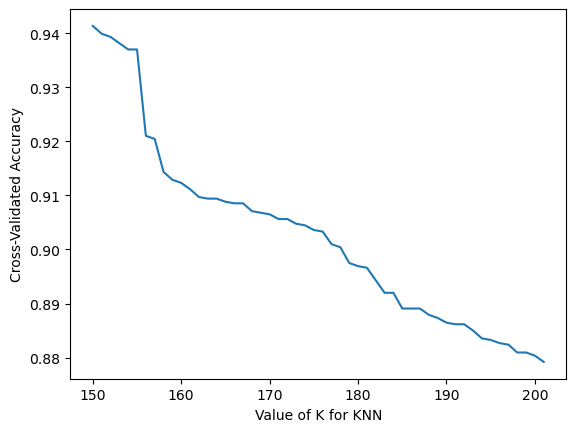

In [639]:
from sklearn.model_selection import cross_val_score,KFold,ShuffleSplit,LeavePOut
k_scores = []
shuffle_split = ShuffleSplit(n_splits=10, test_size=0.3)
k_range = list(range(150,202))
for k in range(150,202):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [653]:
clf=KNeighborsClassifier(n_neighbors=153)


In [655]:
## cross validation
from sklearn.model_selection import train_test_split,cross_val_score,KFold,ShuffleSplit,LeavePOut

shuffle_split = ShuffleSplit(n_splits=10, test_size=0.3)
k_folds = KFold(n_splits = 10,shuffle=True)
scores = cross_val_score(clf, X_train, y_train, cv=10)
scores_shuffle_split = cross_val_score(clf,X_train, y_train, cv=shuffle_split)
scores_k_folds = cross_val_score(clf, X_train, y_train ,cv=k_folds)

print("scores cv=10")
print(scores.mean())

print("scores cv=shuffle_split")
print(scores_shuffle_split.mean())
print("scores cv=k_folds")
print(scores_k_folds.mean())


scores cv=10
0.8969245028648467
scores cv=shuffle_split
0.7997098646034816
scores cv=k_folds
0.8943006403774858


In [657]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)


In [659]:

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)

print("Accuracy :",accuracy_score(y_test,y_pred))
print('F1 : ',f1_score(y_test, y_pred,average='weighted'))
# scores_shuffle_split = cross_val_score(clf,X_train, y_train, cv=shuffle_split).mean()
# print("scores ")
# print(scores_shuffle_split)


Confusion Matrix:
[[43  0  0 ...  0  0  0]
 [ 0 33  0 ...  0  0  0]
 [ 0  0 26 ...  0  0  0]
 ...
 [ 0  0  0 ... 29  0  0]
 [ 0  0  0 ...  0 34  0]
 [ 0  0  0 ...  0  0 12]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        33
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        33
           5       1.00      1.00      1.00        28
           6       1.00      1.00      1.00        40
           7       1.00      1.00      1.00        33
           8       1.00      1.00      1.00        40
           9       1.00      1.00      1.00        43
          10       1.00      1.00      1.00        36
          11       1.00      1.00      1.00        42
          12       1.00      1.00      1.00        32
          13       1.00      1.00      1.00   

## KNN Algorithm based on Second data-preprocessing

In [327]:
X_train,X_test,y_train,y_test=train_test_split(x2,y2,test_size=0.3,random_state=30)


In [339]:
HyperParametrs={'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,31],
             
               }

               #    'weights' : ['uniform','distance'],
               # 'metric' : ['minkowski','euclidean','manhattan'],
               #  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
clf = KNeighborsClassifier()
grid_search = GridSearchCV(clf, HyperParametrs, cv=10, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)
print("Best estimator : ",grid_search.best_estimator_)


Fitting 10 folds for each of 27 candidates, totalling 270 fits
Best parameters found:  {'n_neighbors': 5}
Best cross-validation score:  0.9947750252780587
Best estimator :  KNeighborsClassifier()


In [341]:

clf=KNeighborsClassifier(n_neighbors=5)
#clf=KNeighborsClassifier(weights='distance')
## cross validation
shuffle_split = ShuffleSplit(n_splits=10, test_size=0.3)
k_folds = KFold(n_splits = 10,shuffle=True)
scores = cross_val_score(clf, X_train, y_train, cv=10)
scores_shuffle_split = cross_val_score(clf,X_train, y_train, cv=shuffle_split)
scores_k_folds = cross_val_score(clf, X_train, y_train ,cv=k_folds)

print("scores cv=10")
print(scores.mean())

print("scores cv=shuffle_split")
print(scores_shuffle_split.mean())
print("scores cv=k_folds")
print(scores_k_folds.mean())

scores cv=10
0.9947750252780587
scores cv=shuffle_split
0.991972920696325
scores cv=k_folds
0.9959352881698686


In [343]:
clf.fit(X_train,y_train)

KNeighborsClassifier()

In [345]:
y_pred=clf.predict(X_test)

In [347]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)

print("Accuracy :",accuracy_score(y_test,y_pred))
print('F1 : ',f1_score(y_test, y_pred,average='weighted'))
scores_shuffle_split = cross_val_score(clf,X_train, y_train, cv=shuffle_split).mean()
print("scores ")
print(scores_shuffle_split)


Confusion Matrix:
[[34  0  0 ...  0  0  0]
 [ 0 31  0 ...  0  0  0]
 [ 0  0 26 ...  0  0  0]
 ...
 [ 0  0  0 ... 39  0  0]
 [ 0  0  0 ...  0 38  0]
 [ 0  0  0 ...  0  0 40]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        33
           5       1.00      1.00      1.00        34
           6       1.00      1.00      1.00        42
           7       1.00      1.00      1.00        37
           8       1.00      1.00      1.00        43
           9       1.00      1.00      1.00        34
          10       1.00      1.00      1.00        32
          11       1.00      1.00      1.00        35
          12       1.00      1.00      1.00        35
          13       1.00      1.00      1.00   

# Decision Tree Model training based on First data-preprocessing

In [378]:
X_train,X_test,y_train,y_test=train_test_split(x1,y1,test_size=0.3)


In [410]:
from sklearn import tree

Hyper_paramters={'max_depth':[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,
                             42,43,44,45,46,47,48,49,50,51,52,53,54,55
                             ]}
clf=tree.DecisionTreeClassifier()
grid_search=GridSearchCV(clf,Hyper_paramters,cv=10,verbose=1,n_jobs=-1)
grid_search.fit(X_train,y_train)
print("Best peramters combination is ")
print(grid_search.best_params_)
print("Best Estimator ")
print(grid_search.best_estimator_)
print("Best cross-validation score:  ")
print(grid_search.best_score_)
accuracy = grid_search.score(X_test, y_test)
print("Test set accuracy: ", accuracy)
importances=grid_search.best_estimator_.feature_importances_


Fitting 10 folds for each of 51 candidates, totalling 510 fits
Best peramters combination is 
{'max_depth': 55}
Best Estimator 
DecisionTreeClassifier(max_depth=55)
Best cross-validation score:  
0.9968048533872599
Test set accuracy:  0.9966124661246613


In [412]:
clf=tree.DecisionTreeClassifier(max_depth=55)


In [414]:

## cross validation
shuffle_split = ShuffleSplit(n_splits=10, test_size=0.3)
k_folds = KFold(n_splits = 10,shuffle=True)
scores = cross_val_score(clf, X_train, y_train, cv=10)
scores_shuffle_split = cross_val_score(clf,X_train, y_train, cv=shuffle_split)
scores_k_folds = cross_val_score(clf, X_train, y_train ,cv=k_folds)

print("scores cv=10")
print(scores.mean())

print("scores cv=shuffle_split")
print(scores_shuffle_split.mean())
print("scores cv=k_folds")
print(scores_k_folds.mean())

scores cv=10
0.9968048533872599
scores cv=shuffle_split
0.9936170212765957
scores cv=k_folds
0.995937815975733


In [416]:

clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [418]:

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred,zero_division=1)
print("Classification Report:",)
print (result1)

print("Accuracy :",accuracy_score(y_test,y_pred))
print('F1 : ',f1_score(y_test, y_pred, average='weighted'))

Confusion Matrix:
[[39  0  0 ...  0  0  0]
 [ 0 35  0 ...  0  0  0]
 [ 0  0 32 ...  0  0  0]
 ...
 [ 0  0  0 ... 37  0  0]
 [ 0  0  0 ...  0 40  0]
 [ 0  0  0 ...  0  0 35]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        32
           3       1.00      1.00      1.00        32
           4       1.00      1.00      1.00        34
           5       1.00      1.00      1.00        40
           6       1.00      1.00      1.00        35
           7       1.00      1.00      1.00        42
           8       1.00      1.00      1.00        37
           9       1.00      1.00      1.00        32
          10       1.00      1.00      1.00        35
          11       1.00      1.00      1.00        40
          12       1.00      1.00      1.00        46
          13       1.00      1.00      1.00   

## Decision Tree Model training based on Second data-preprocessing

In [423]:
X_train,X_test,y_train,y_test=train_test_split(x2,y2,test_size=0.3)


In [481]:

Hyper_paramters={'max_depth':[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],
                }
clf=tree.DecisionTreeClassifier()
grid_search=GridSearchCV(clf,Hyper_paramters,cv=10,verbose=1,n_jobs=-1)
grid_search.fit(X_train,y_train)
print("Best peramters combination is ")
print(grid_search.best_params_)
print("Best Estimator ")
print(grid_search.best_estimator_)
print("Best cross-validation score:  ")
print(grid_search.best_score_)
accuracy = grid_search.score(X_test, y_test)
print("Test set accuracy: ", accuracy)
importances=grid_search.best_estimator_.feature_importances_
print("importances ", importances)

Fitting 10 folds for each of 15 candidates, totalling 150 fits
Best peramters combination is 
{'max_depth': 19}
Best Estimator 
DecisionTreeClassifier(max_depth=19)
Best cross-validation score:  
0.9883881024603978
Test set accuracy:  0.9986449864498645
importances  [0.04096824 0.22115603 0.25459939 0.12763474 0.0985241  0.07356362
 0.02687615 0.         0.02629091 0.05198627 0.00332346 0.02599875
 0.02629261 0.         0.02278572 0.         0.        ]


In [487]:
clf=tree.DecisionTreeClassifier(max_depth=19)


In [489]:

## cross validation
shuffle_split = ShuffleSplit(n_splits=10, test_size=0.3)
k_folds = KFold(n_splits = 10,shuffle=True)
scores = cross_val_score(clf, X_train, y_train, cv=10)
scores_shuffle_split = cross_val_score(clf,X_train, y_train, cv=shuffle_split)
scores_k_folds = cross_val_score(clf, X_train, y_train ,cv=k_folds)

print("scores cv=10")
print(scores.mean())

print("scores cv=shuffle_split")
print(scores_shuffle_split.mean())
print("scores cv=k_folds")
print(scores_k_folds.mean())

scores cv=10
0.9880974047859793
scores cv=shuffle_split
0.991779497098646
scores cv=k_folds
0.9965192113245702


In [491]:

clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [493]:

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred,zero_division=1)
print("Classification Report:",)
print (result1)

print("Accuracy :",accuracy_score(y_test,y_pred))
print('F1 : ',f1_score(y_test, y_pred, average='weighted'))

Confusion Matrix:
[[40  0  0 ...  0  0  0]
 [ 0 22  0 ...  0  0  0]
 [ 0  0 39 ...  0  0  0]
 ...
 [ 0  0  0 ... 44  0  0]
 [ 0  0  0 ...  0 20  0]
 [ 0  0  0 ...  0  0 38]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        39
           3       1.00      1.00      1.00        38
           4       1.00      1.00      1.00        34
           5       1.00      1.00      1.00        37
           6       1.00      1.00      1.00        35
           7       1.00      1.00      1.00        33
           8       1.00      1.00      1.00        43
           9       1.00      1.00      1.00        41
          10       1.00      1.00      1.00        32
          11       1.00      1.00      1.00        38
          12       1.00      1.00      1.00        34
          13       1.00      1.00      1.00   